In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
sns.set_style(style="whitegrid")

In [2]:
df= pd.read_csv("drug200.csv")

In [3]:
df.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
106,22,M,NORMAL,HIGH,11.953,drugX
128,47,M,LOW,NORMAL,33.542,DrugY
157,53,M,LOW,HIGH,22.963,DrugY
158,59,F,LOW,HIGH,10.444,drugC
185,57,F,NORMAL,NORMAL,25.893,DrugY


In [4]:
df.shape

(200, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


In [10]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [11]:
df["Drug"].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

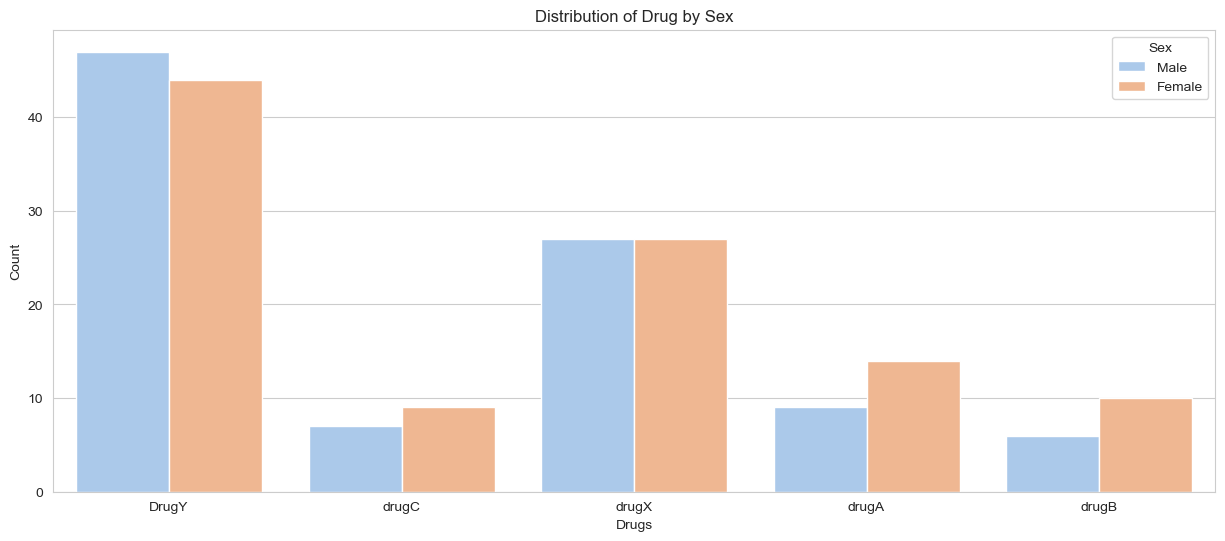

In [12]:
plt.figure(figsize=(15,6))

sns.countplot(data =df,x = "Drug", hue="Sex",palette="pastel")

plt.title("Distribution of Drug by Sex")
plt.xlabel("Drugs")
plt.ylabel("Count")
plt.legend(title="Sex", loc="upper right", labels=["Male", "Female"])
plt.show()

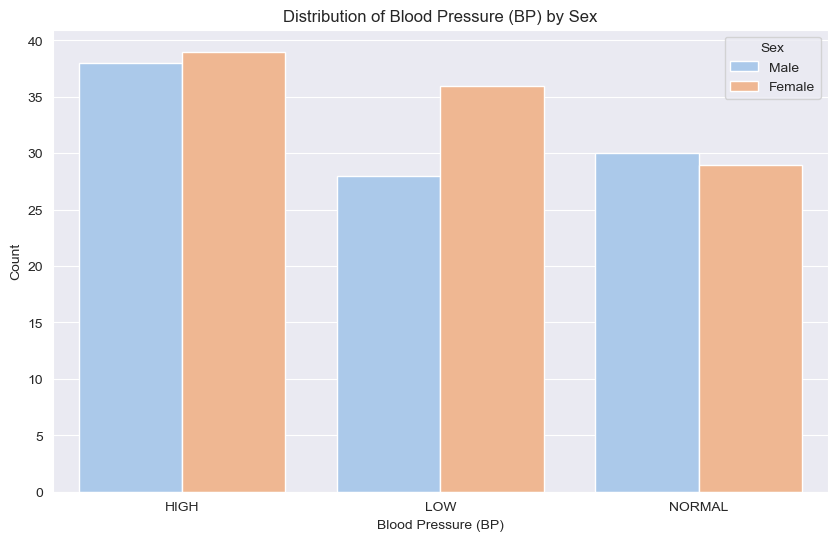

In [13]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="BP", hue="Sex", palette="pastel")
plt.title("Distribution of Blood Pressure (BP) by Sex")
plt.xlabel("Blood Pressure (BP)")
plt.ylabel("Count")
plt.legend(title="Sex", loc="upper right", labels=["Male", "Female"])
plt.show()

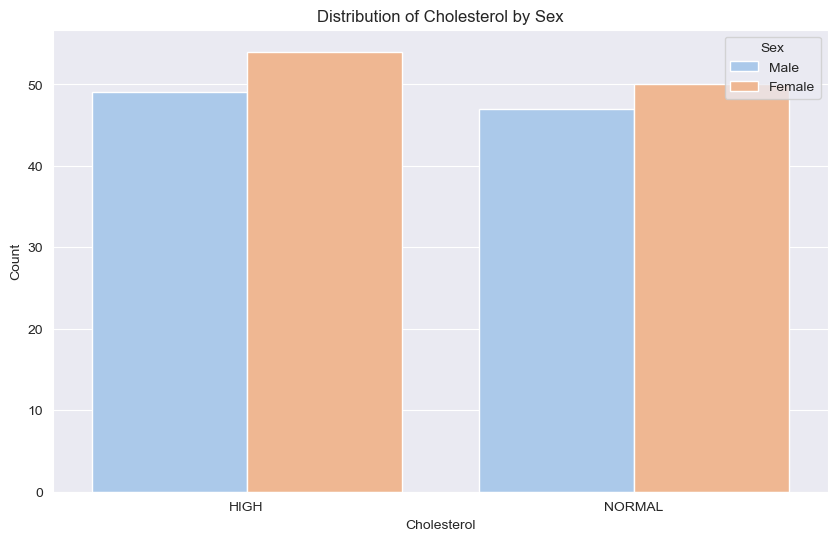

In [14]:
plt.figure(figsize=(10,6))

sns.countplot(data =df,x = "Cholesterol", hue="Sex",palette="pastel")

plt.title("Distribution of Cholesterol by Sex")
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.legend(title="Sex", loc="upper right", labels=["Male", "Female"])
plt.show()

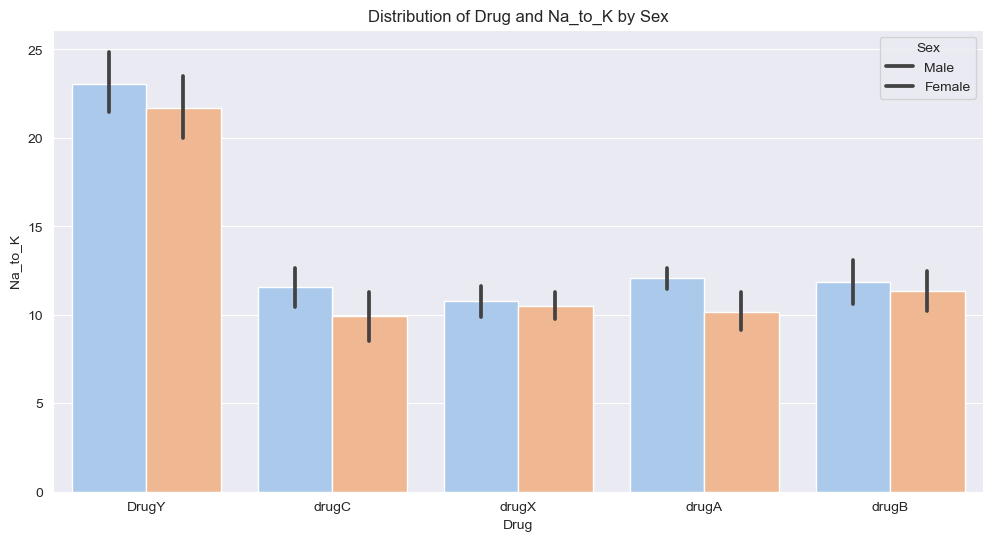

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x="Drug",y="Na_to_K",hue="Sex",palette="pastel")
plt.title("Distribution of Drug and Na_to_K by Sex")
plt.xlabel("Drug")
plt.ylabel("Na_to_K")
plt.legend(title="Sex", loc="upper right", labels=["Male", "Female"])
plt.show()

<Axes: xlabel='Drug', ylabel='Na_to_K'>

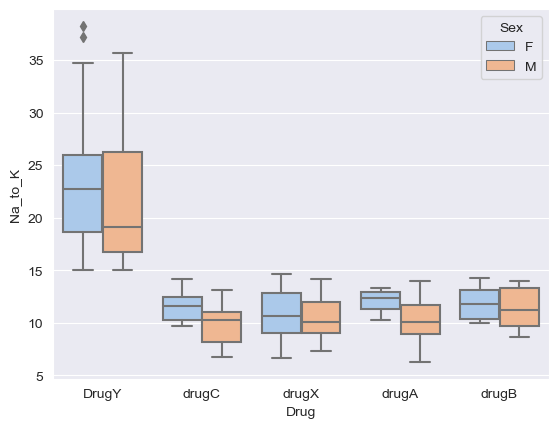

In [18]:
sns.boxplot(data=df,x="Drug",y="Na_to_K",hue="Sex",palette="pastel")

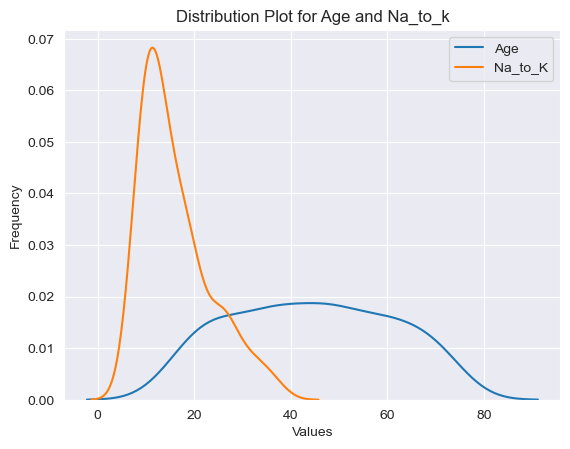

In [19]:
sns.distplot( x=df['Age'], hist=False, label='Age', bins=10)
sns.distplot( x=df['Na_to_K'],hist=False, label='Na_to_K', bins=10)
plt.title("Distribution Plot for Age and Na_to_k")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [20]:
df.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
93,42,F,LOW,NORMAL,29.271,DrugY
89,50,F,NORMAL,NORMAL,17.211,DrugY
71,28,F,NORMAL,HIGH,19.675,DrugY
137,35,F,HIGH,HIGH,12.894,drugA
153,72,F,LOW,NORMAL,14.642,drugX


In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [22]:
X=df.drop("Drug",axis=1)
y=df["Drug"]

In [23]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_encoded,test_size=0.5,random_state=42)

In [25]:
trans_x = ColumnTransformer(transformers=[
    ("trf1", OneHotEncoder(sparse=False, drop="first"), ["Sex", "BP", "Cholesterol"]),
    ("trf2", StandardScaler(), ['Age', 'Na_to_K'])
], remainder="passthrough")

In [26]:
X_train_new = trans_x.fit_transform(X_train)
X_test_new = trans_x.fit_transform(X_test)

In [27]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(X_train_new,y_train)

SGDClassifier()

In [28]:
y_pred = sgd.predict(X_test_new)

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd,X_train_new,y_train,cv=10,scoring="accuracy")

array([0.9, 0.9, 0.7, 1. , 0.9, 0.9, 0.9, 0.8, 0.9, 0.9])

In [30]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [31]:
y_pred = cross_val_predict(sgd,X_train_new,y_train,cv=10)
cm = confusion_matrix(y_train,y_pred)
cm

array([[48,  0,  0,  0,  1],
       [ 1,  4,  2,  0,  0],
       [ 1,  2,  5,  0,  0],
       [ 0,  0,  1,  8,  0],
       [ 3,  0,  0,  0, 24]], dtype=int64)

<Axes: >

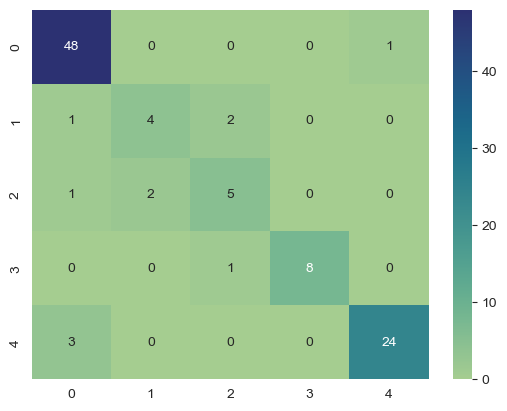

In [32]:
sns.heatmap(cm,cmap='crest', annot=True)

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score
pre = precision_score(y_train,y_pred, average="macro")
rec = recall_score(y_train, y_pred, average="macro")
f1 = f1_score(y_train,y_pred, average="macro")

print("Precision Score : ", pre)
print("Recall Score : ", rec)
print("F1 Score : ", f1)

y_score = cross_val_predict(sgd,X_train_new,y_train,cv=3)

Precision Score :  0.8314654088050315
Recall Score :  0.7907596371882086
F1 Score :  0.8091628959276018


In [34]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelBinarizer

y_scores = cross_val_predict(sgd, X_train_new, y_train, cv=3, method='decision_function')
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)                

precisions = dict()
recalls = dict()
thresholds = dict()
for i in range(len(lb.classes_)):
    precisions[i], recalls[i], thresholds[i] = precision_recall_curve(y_train_binarized[:, i], y_scores[:, i])

In [36]:
class_labels = lb.classes_

def plot_curve(precisions, recalls, thresholds, class_labels):
    num_classes = len(class_labels)
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20), sharex=True)

    for class_index, label in enumerate(class_labels):
        if class_index >= num_classes:
            break
        
        row = class_index // 4
        col = class_index % 4
        axes[row, col].plot(thresholds[class_index], precisions[class_index][:-1], "b--", label=f"Precision {label}")
        axes[row, col].plot(thresholds[class_index], recalls[class_index][:-1], "g--", label=f"Recall {label}")
        axes[row, col].set_title(f"Precision-Recall Curve for {label} (Class {class_index})")
        axes[row, col].legend()
        axes[row, col].set_xlabel("Threshold")
        axes[row, col].set_ylabel("Score")
        
    for class_index in range(num_classes, 16):
        row = class_index // 4
        col = class_index % 4
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.show()

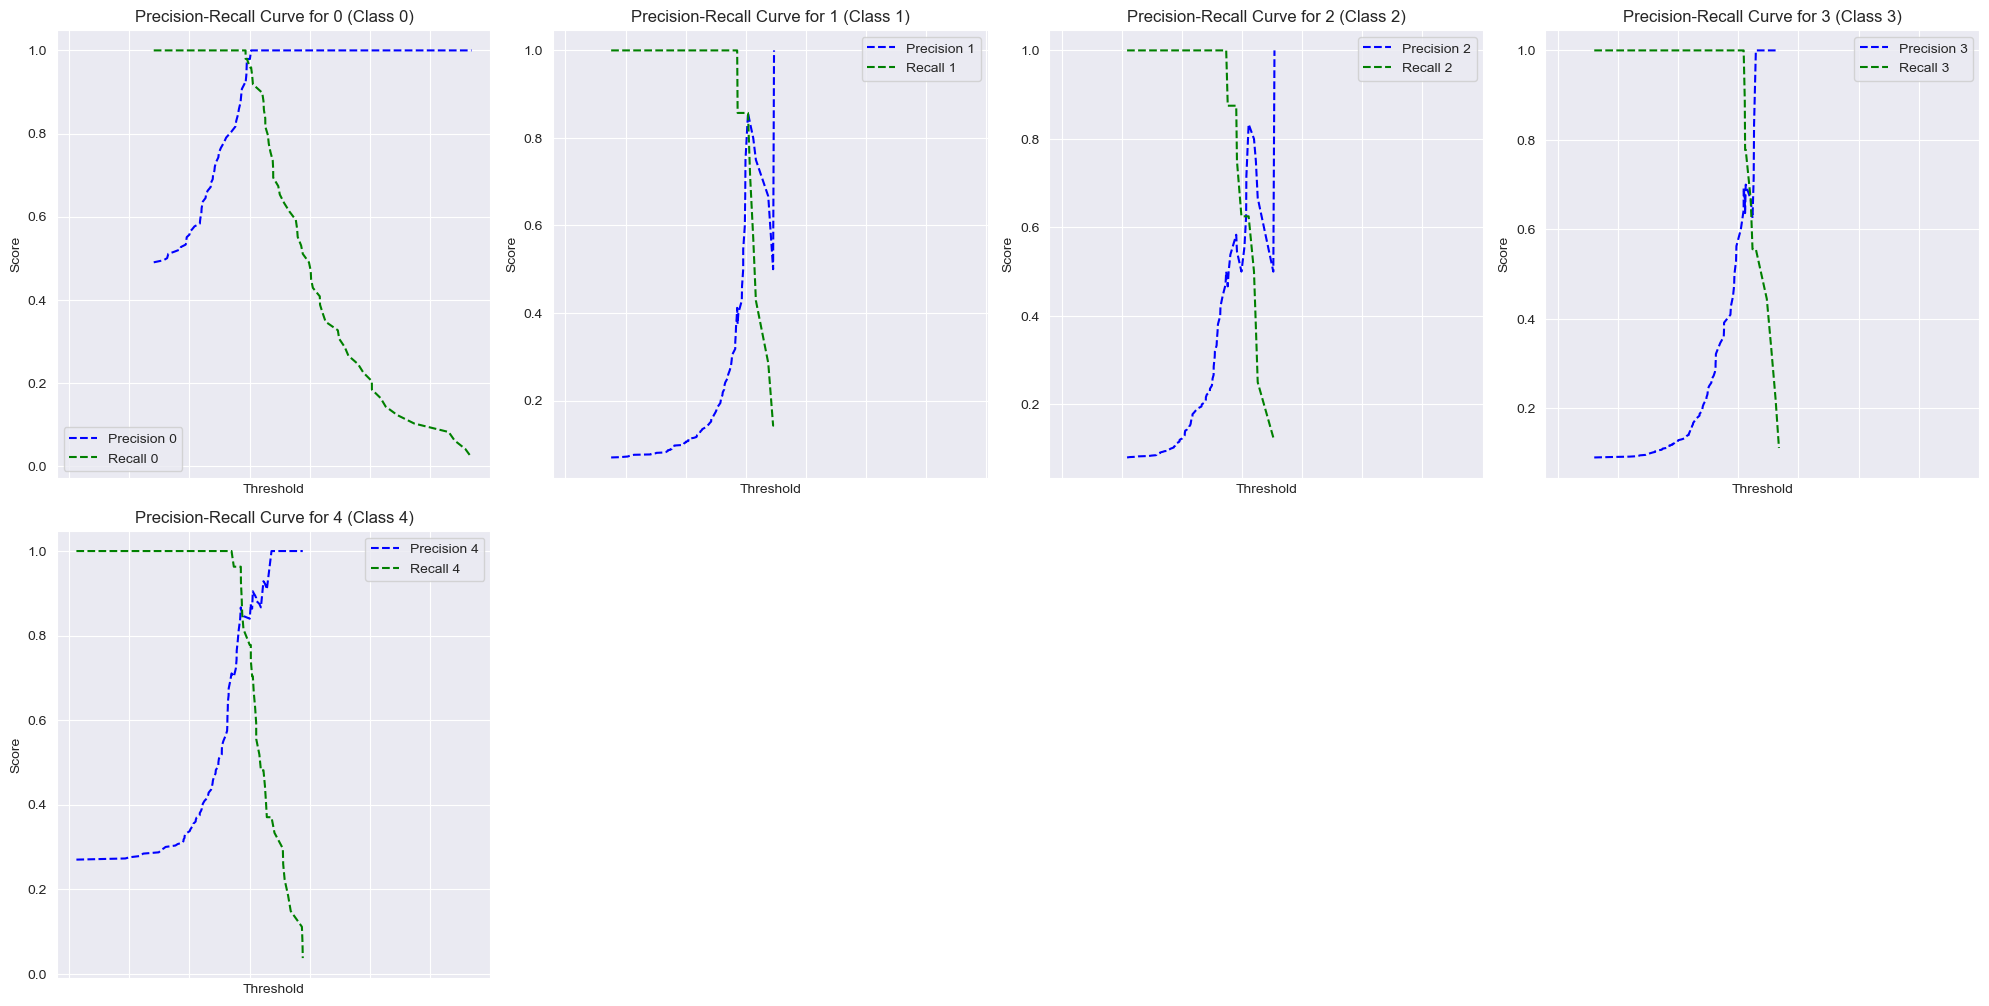

In [37]:
plot_curve(precisions, recalls, thresholds, class_labels)

In [38]:
from sklearn.metrics import roc_curve

fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_train_binarized[:, i], y_scores[:, i])

In [39]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_train_binarized[:, i], y_scores[:, i])

In [40]:
def plot_roc(fpr, tpr, class_labels):
    plt.figure(figsize=(8, 6))
    for class_index, label in enumerate(class_labels):
        plt.plot(fpr[class_index], tpr[class_index], linewidth=2, label=f"ROC Curve for {label}")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Receiver Operating Characteristic (ROC) Curves for Multiclass Classification")
    plt.legend()
    plt.show()

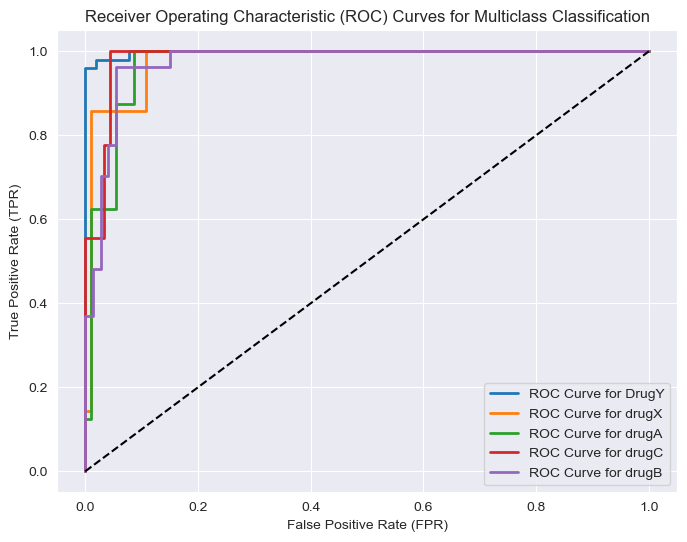

In [41]:
class_labels = ['DrugY', 'drugX', 'drugA', 'drugC', 'drugB']
plot_roc(fpr, tpr, class_labels)

In [42]:
from sklearn.metrics import roc_auc_score,accuracy_score
roc_auc_scores = dict()
for class_index, label in enumerate(class_labels):
    roc_auc_scores[label] = roc_auc_score(y_train_binarized[:, class_index], y_scores[:, class_index])

In [43]:
print(roc_auc_scores)

{'DrugY': 0.997999199679872, 'drugX': 0.9769585253456221, 'drugA': 0.9701086956521741, 'drugC': 0.982905982905983, 'drugB': 0.9736174530695079}


In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)  
knn_classifier.fit(X_train_new, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
y_pred = knn_classifier.predict(X_test_new)

In [47]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

In [48]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.79
Precision: 0.7692640692640692
Recall: 0.7713624338624339
F1 Score: 0.749837601370174
Confusion Matrix:
[[36  0  3  1  2]
 [ 2 11  3  0  0]
 [ 0  0  8  0  0]
 [ 3  0  0  4  0]
 [ 3  3  1  0 20]]


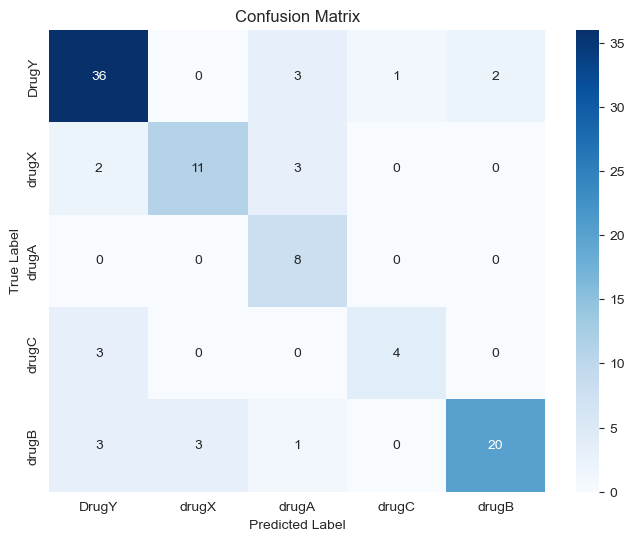

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()